In [1]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install --upgrade opencv-python matplotlib


   ---------------------------------------- 38.8/38.8 MB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 8.0/8.0 MB 939.8 kB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

dua_tangan = ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'K', 'P', 'S', 'T', 'Y', 'Z']
satu_tangan = ['C', 'I', 'J', 'L', 'M', 'N', 'O', 'R', 'U', 'V', 'W']

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = 'dataset'

data_satu_tangan = []
data_dua_tangan = []

labels_satu_tangan = []
labels_dua_tangan = []

for dir_ in os.listdir(DATA_DIR):
    if dir_ in dua_tangan:
        tangan = 'dua_tangan'
    elif dir_ in satu_tangan:
        tangan = 'satu_tangan'
    else:
        continue

    img_count = 0
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        img_count += 1
        data_aux = []
        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            if len(results.multi_hand_landmarks) == 2 and tangan == 'dua_tangan':
                for hand_landmarks in results.multi_hand_landmarks:
                  x_coords = [landmark.x for landmark in hand_landmarks.landmark]
                  y_coords = [landmark.y for landmark in hand_landmarks.landmark]
                  xmin, xmax = min(x_coords), max(x_coords)
                  ymin, ymax = min(y_coords), max(y_coords)

                  img_height, img_width, _ = img_rgb.shape
                  mid_vertical_min = img_height * 0.33
                  mid_vertical_max = img_height * 0.66

                  ymin_img = ymin * img_height
                  ymax_img = ymax * img_height

                  # if mid_vertical_min < ymin_img < mid_vertical_max and mid_vertical_min < ymax_img < mid_vertical_max:
                  for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                  for i in range(len(hand_landmarks.landmark)):

                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

                if data_aux:
                  data_dua_tangan.append(data_aux)
                  labels_dua_tangan.append(dir_)
                else:
                  print(f'Warning: Data tidak valid untuk {dir_}{img_count}')

            elif len(results.multi_hand_landmarks) == 1 and tangan == 'dua_tangan':
                print(f'dua tangan terdeteksi satu tangan pada data {dir_}{img_count}')

            else:
                for hand_landmarks in results.multi_hand_landmarks:
                  x_coords = [landmark.x for landmark in hand_landmarks.landmark]
                  y_coords = [landmark.y for landmark in hand_landmarks.landmark]
                  xmin, xmax = min(x_coords), max(x_coords)
                  ymin, ymax = min(y_coords), max(y_coords)

                  img_height, img_width, _ = img_rgb.shape
                  mid_vertical_min = img_height * 0.33
                  mid_vertical_max = img_height * 0.66

                  ymin_img = ymin * img_height
                  ymax_img = ymax * img_height

                  # if mid_vertical_min < ymin_img < mid_vertical_max and mid_vertical_min < ymax_img < mid_vertical_max:
                  for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                  for i in range(len(hand_landmarks.landmark)):

                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

                if data_aux:
                  data_satu_tangan.append(data_aux)
                  labels_satu_tangan.append(dir_)
                else:
                  print(f'Warning: Data tidak valid untuk {dir_}{img_count}')

        else:
            print(f'tidak ada tangan terdeteksi pada data {dir_}{img_count}')

#         plt.figure()
#         plt.imshow(img_rgb)
# plt.show()

# Simpan data ke file pickle
with open('data_satu_tangan.pickle', 'wb') as f:
    pickle.dump({'data': data_satu_tangan, 'labels': labels_satu_tangan}, f)

with open('data_dua_tangan.pickle', 'wb') as f:
    pickle.dump({'data': data_dua_tangan, 'labels': labels_dua_tangan}, f)


In [6]:
import os
import pickle
import mediapipe as mp
import cv2

# Nama folder untuk label baru
new_label = 'I'

# Path folder data
DATA_DIR = 'dataset'

# Memuat data dan label yang ada dari file pickle
with open('data_dua_tangan.pickle', 'rb') as f:
    data_dict = pickle.load(f)
    data_dua_tangan = data_dict['data']
    labels_dua_tangan = data_dict['labels']

# Menghapus data dan label dengan label 'I2'
indices_to_remove = [i for i, label in enumerate(labels_dua_tangan) if label == 'I2']
data_dua_tangan = [data for i, data in enumerate(data_dua_tangan) if i not in indices_to_remove]
labels_dua_tangan = [label for i, label in enumerate(labels_dua_tangan) if i not in indices_to_remove]

# Inisialisasi Mediapipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# Memproses data dari folder baru
new_data = []
new_labels = []

img_count = 0
for img_path in os.listdir(os.path.join(DATA_DIR, new_label)):
    img_count += 1
    data_aux = []
    x_ = []
    y_ = []

    img = cv2.imread(os.path.join(DATA_DIR, new_label, img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(img_rgb)

    if results.multi_hand_landmarks:
        if len(results.multi_hand_landmarks) == 2:
            for hand_landmarks in results.multi_hand_landmarks:
                x_coords = [landmark.x for landmark in hand_landmarks.landmark]
                y_coords = [landmark.y for landmark in hand_landmarks.landmark]

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            if data_aux:
                new_data.append(data_aux)
                new_labels.append(new_label)
            else:
                print(f'Warning: Data tidak valid untuk {new_label}{img_count}')
        else:
            print(f'dua tangan terdeteksi satu tangan pada data {new_label}{img_count}')
    else:
        print(f'tidak ada tangan terdeteksi pada data {new_label}{img_count}')

# Menggabungkan data dan label baru dengan yang lama
data_dua_tangan.extend(new_data)
labels_dua_tangan.extend(new_labels)

# Menyimpan kembali data gabungan ke dalam file pickle
with open('data_dua_tangan.pickle', 'wb') as f:
    pickle.dump({'data': data_dua_tangan, 'labels': labels_dua_tangan}, f)


dua tangan terdeteksi satu tangan pada data I282
dua tangan terdeteksi satu tangan pada data I283
dua tangan terdeteksi satu tangan pada data I284
dua tangan terdeteksi satu tangan pada data I315
dua tangan terdeteksi satu tangan pada data I325
dua tangan terdeteksi satu tangan pada data I326
dua tangan terdeteksi satu tangan pada data I327
dua tangan terdeteksi satu tangan pada data I328
dua tangan terdeteksi satu tangan pada data I332
dua tangan terdeteksi satu tangan pada data I355
dua tangan terdeteksi satu tangan pada data I356
dua tangan terdeteksi satu tangan pada data I974
dua tangan terdeteksi satu tangan pada data I975
dua tangan terdeteksi satu tangan pada data I976
dua tangan terdeteksi satu tangan pada data I977
dua tangan terdeteksi satu tangan pada data I978
dua tangan terdeteksi satu tangan pada data I980
dua tangan terdeteksi satu tangan pada data I981
dua tangan terdeteksi satu tangan pada data I982
dua tangan terdeteksi satu tangan pada data I983
dua tangan terdeteks

In [7]:
data_dict = pickle.load(open('data_satu_tangan.pickle', 'rb'))
data = data_dict['data']
labels = data_dict['labels']

data_dict1 = pickle.load(open('data_dua_tangan.pickle', 'rb'))
data1 = data_dict1['data']
labels1 = data_dict1['labels']

print(len(data))
print(len(labels))

print(len(data1))
print(len(labels1))

10723
10723
13384
13384


In [8]:
count = 0
for i in(range(len(data1))):
  if len(data1[i]) != 84:
    count += 1
print(f'data inkonsisten berjumlah {count}')

data inkonsisten berjumlah 0


In [6]:
count = 0
for i in(range(len(data))):
  if len(data[i]) != 42:
    count += 1
print(f'data inkonsisten berjumlah {count}')

data inkonsisten berjumlah 171


In [15]:
import numpy as np
filter_data = []
filter_label = []
for i in range(len(data)):
  if len(data[i]) == 42:
    filter_data.append(data[i])
    filter_label.append(labels[i])
    # print(labels1[i])
    # print(f'data ke- {i} berhasil ditambahkan')

print(len(filter_label))
print(len(filter_data))

data1 = np.asarray(filter_data)
labels1 = np.asarray(filter_label)

print(len(data1))
print(len(labels1))

10552
10552
10552
10552


## Jumlah Data Dua Tangan

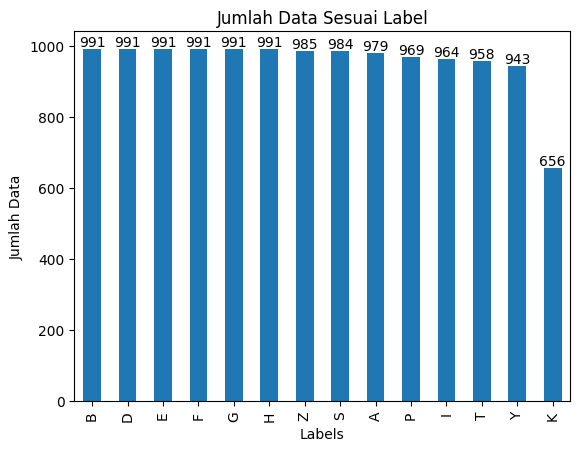

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data_dict1)

# Menghitung jumlah data untuk setiap label
label_counts = df['labels'].value_counts()

# Membuat diagram batang
fig, ax = plt.subplots()
label_counts.plot(kind='bar', ax=ax)

# Menambahkan label untuk setiap batang
for i, count in enumerate(label_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.xlabel('Labels')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Sesuai Label')
plt.show()


## Jumlah Data Satu Tangan

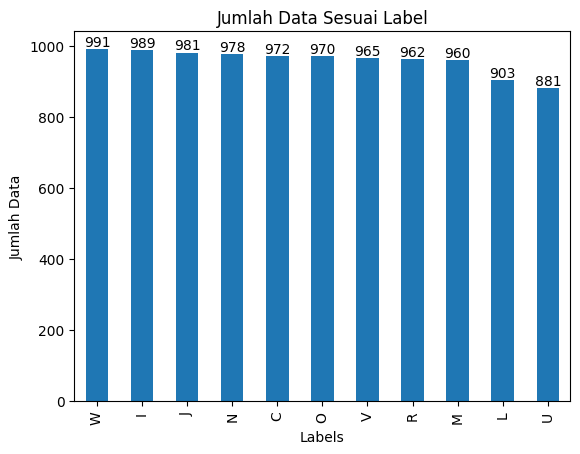

In [18]:
# Ubah data1 dan labels1 ke DataFrame
df = pd.DataFrame({'data': list(data1), 'label': labels1})

# Menghitung jumlah data untuk setiap label
label_counts = df['label'].value_counts()

# Membuat diagram batang
fig, ax = plt.subplots()
label_counts.plot(kind='bar', ax=ax)

# Menambahkan label untuk setiap batang
for i, count in enumerate(label_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.xlabel('Labels')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Sesuai Label')
plt.show()